Install Libraries

In [45]:
!pip install numpy pandas scipy scikit-learn seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable


Load Data

In [11]:
from scipy.io import arff
import pandas as pd

# Load the ARFF data
data = arff.loadarff('diabetes.arff')  # Replace with the correct path to the ARFF file
df = pd.DataFrame(data[0])

# Decode byte strings if necessary (depends on the format of your 'class' column)
df['Outcome'] = df['Outcome'].apply(lambda x: x.decode('utf-8'))

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [37]:
# Separate the target column (assumed to be 'class') from the features
features = df.drop(columns=['Outcome'])
target = df['Outcome']

# Select only numeric columns
numeric_features = features.select_dtypes(include=[float, int])

# Clip outliers for numeric columns only
numeric_clipped = numeric_features.clip(lower=numeric_features.quantile(0.01), upper=numeric_features.quantile(0.99), axis=1)

# Recombine the clipped numeric features with the target column
df_clipped = pd.concat([numeric_clipped, target], axis=1)

# Display the first few rows of the clipped DataFrame
df_clipped.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.62700,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.35100,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.67200,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.69833,33.0,1


In [55]:
from sklearn.feature_selection import f_classif

# Separate features and target
X = df.drop(columns=['Outcome'])  # assuming 'class' is the target column
y = df['Outcome']

# Perform ANOVA F-test
f_values, p_values = f_classif(X, y)

# Add the F-values to a dataframe for easy comparison
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
anova_results = anova_results.sort_values(by='F-Value', ascending=False)

anova_results



,Feature,F-Value,P-Value
1,Glucose,213.161752,8.935432e-43
5,BMI,71.772072,1.229807e-16
7,Age,46.140611,2.209975e-11
0,Pregnancies,39.670227,5.065127e-10
6,DiabetesPedigreeFunction,23.871300,1.254607e-06
4,Insulin,13.281108,2.861865e-04
3,SkinThickness,4.304381,3.834770e-02
2,BloodPressure,3.256950,7.151390e-02


In [53]:
best_feature = anova_results.iloc[0]['Feature']
worst_feature = anova_results.iloc[-1]['Feature']

print(f"Best discriminative feature: {best_feature}")
print(f"Worst discriminative feature: {worst_feature}")


Best discriminative feature: Glucose
Worst discriminative feature: BloodPressure


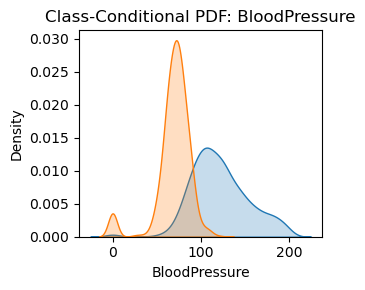

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(6, 3))

# Plot PDF for the best discriminative feature
plt.subplot(1, 2, 1)
sns.kdeplot(df[best_feature], fill=True)
plt.title(f'Class-Conditional PDF: {best_feature}')
plt.xlabel(best_feature)
plt.ylabel('Density')

# Plot PDF for the worst discriminative feature
plt.subplot(1, 2, 1)
sns.kdeplot(df[worst_feature], label='Diabetes', fill=True)
plt.title(f'Class-Conditional PDF: {worst_feature}')
plt.xlabel(worst_feature)
plt.ylabel('Density')

plt.tight_layout()
plt.show()